# CZ/CE 4041 Machine Learning

## Plant Seedling Classification [Kaggle]

## Approach 3: Support Vector Machines

## Team
* Dwivedee Lakshyajeet
* Gupta Jay
* Bansal Aditya
* Mantri Raghav
* Bhatia Ritik

> Warning: This notebook was created on the Kaggle platform where it fetches data from the Kaggle directories. It will not work by default on the Jupyter Notebook Platform.

## Uploading/importing images

In [1]:
import pandas as pd
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn import svm
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/plant-seedlings-classification/sample_submission.csv
/kaggle/input/plant-seedlings-classification/test/fd87b36ae.png
/kaggle/input/plant-seedlings-classification/test/0e8492cb1.png
/kaggle/input/plant-seedlings-classification/test/8d6acbe9b.png
/kaggle/input/plant-seedlings-classification/test/54b3afd58.png
/kaggle/input/plant-seedlings-classification/test/6049234e6.png
/kaggle/input/plant-seedlings-classification/test/82b5f4d33.png
/kaggle/input/plant-seedlings-classification/test/a0f37c726.png
/kaggle/input/plant-seedlings-classification/test/e0ec5b6a1.png
/kaggle/input/plant-seedlings-classification/test/1cfd91582.png
/kaggle/input/plant-seedlings-classification/test/456d507c0.png
/kaggle/input/plant-seedlings-classification/test/d6d31dcbe.png
/kaggle/input/plant-seedlings-classification/test/e1abb4ff9.png
/kaggle/input/plant-seedlings-classification/test/aa7d098d1.png
/kaggle/input/plant-seedlings-classification/test/e19673dc9.png
/kaggle/input/plant-seedlings-classif

/kaggle/input/plant-seedlings-classification/train/Scentless Mayweed/4ae939d7d.png
/kaggle/input/plant-seedlings-classification/train/Scentless Mayweed/b8664f705.png
/kaggle/input/plant-seedlings-classification/train/Scentless Mayweed/628b08c82.png
/kaggle/input/plant-seedlings-classification/train/Scentless Mayweed/9ab3b61db.png
/kaggle/input/plant-seedlings-classification/train/Scentless Mayweed/086894274.png
/kaggle/input/plant-seedlings-classification/train/Scentless Mayweed/b8c3b0f4b.png
/kaggle/input/plant-seedlings-classification/train/Scentless Mayweed/b0885ca26.png
/kaggle/input/plant-seedlings-classification/train/Scentless Mayweed/0bccfe309.png
/kaggle/input/plant-seedlings-classification/train/Scentless Mayweed/d0af40a2d.png
/kaggle/input/plant-seedlings-classification/train/Scentless Mayweed/f7bbaeed3.png
/kaggle/input/plant-seedlings-classification/train/Scentless Mayweed/7b95f2701.png
/kaggle/input/plant-seedlings-classification/train/Scentless Mayweed/3fb764193.png
/kag

/kaggle/input/plant-seedlings-classification/train/Charlock/67e37de9b.png
/kaggle/input/plant-seedlings-classification/train/Charlock/8b35222d0.png
/kaggle/input/plant-seedlings-classification/train/Charlock/4e0cef11d.png
/kaggle/input/plant-seedlings-classification/train/Charlock/84281dd7c.png
/kaggle/input/plant-seedlings-classification/train/Charlock/d04eff450.png
/kaggle/input/plant-seedlings-classification/train/Charlock/ffe349114.png
/kaggle/input/plant-seedlings-classification/train/Charlock/903fff84f.png
/kaggle/input/plant-seedlings-classification/train/Charlock/25cab77ab.png
/kaggle/input/plant-seedlings-classification/train/Charlock/9c55fa55a.png
/kaggle/input/plant-seedlings-classification/train/Charlock/f0ced8a62.png
/kaggle/input/plant-seedlings-classification/train/Charlock/1716acd53.png
/kaggle/input/plant-seedlings-classification/train/Charlock/4c19db861.png
/kaggle/input/plant-seedlings-classification/train/Charlock/cb142c018.png
/kaggle/input/plant-seedlings-classifi

/kaggle/input/plant-seedlings-classification/train/Sugar beet/4839e4577.png
/kaggle/input/plant-seedlings-classification/train/Sugar beet/3041d1470.png
/kaggle/input/plant-seedlings-classification/train/Sugar beet/fef5e7066.png
/kaggle/input/plant-seedlings-classification/train/Sugar beet/ed71987ae.png
/kaggle/input/plant-seedlings-classification/train/Sugar beet/6d63eb98f.png
/kaggle/input/plant-seedlings-classification/train/Sugar beet/915689d7d.png
/kaggle/input/plant-seedlings-classification/train/Sugar beet/657ba211d.png
/kaggle/input/plant-seedlings-classification/train/Sugar beet/00acffa82.png
/kaggle/input/plant-seedlings-classification/train/Sugar beet/2ed22fddd.png
/kaggle/input/plant-seedlings-classification/train/Sugar beet/8fafd3b98.png
/kaggle/input/plant-seedlings-classification/train/Sugar beet/35bccf6c9.png
/kaggle/input/plant-seedlings-classification/train/Sugar beet/5582aca59.png
/kaggle/input/plant-seedlings-classification/train/Sugar beet/8738994fa.png
/kaggle/inpu

/kaggle/input/plant-seedlings-classification/train/Loose Silky-bent/93d9858f0.png
/kaggle/input/plant-seedlings-classification/train/Loose Silky-bent/de82f96f1.png
/kaggle/input/plant-seedlings-classification/train/Loose Silky-bent/6d2f11b51.png
/kaggle/input/plant-seedlings-classification/train/Loose Silky-bent/17d3e7e2c.png
/kaggle/input/plant-seedlings-classification/train/Loose Silky-bent/f9d597956.png
/kaggle/input/plant-seedlings-classification/train/Loose Silky-bent/88a48f427.png
/kaggle/input/plant-seedlings-classification/train/Loose Silky-bent/3d109d1b0.png
/kaggle/input/plant-seedlings-classification/train/Loose Silky-bent/549a41c42.png
/kaggle/input/plant-seedlings-classification/train/Loose Silky-bent/3c46bd512.png
/kaggle/input/plant-seedlings-classification/train/Loose Silky-bent/86f407dd7.png
/kaggle/input/plant-seedlings-classification/train/Loose Silky-bent/9b7799b3c.png
/kaggle/input/plant-seedlings-classification/train/Loose Silky-bent/d0228efc3.png
/kaggle/input/pl

/kaggle/input/plant-seedlings-classification/train/Cleavers/bd6681c02.png
/kaggle/input/plant-seedlings-classification/train/Cleavers/6bcc0c252.png
/kaggle/input/plant-seedlings-classification/train/Cleavers/3fc47de35.png
/kaggle/input/plant-seedlings-classification/train/Cleavers/d8597aa6a.png
/kaggle/input/plant-seedlings-classification/train/Cleavers/420f3654f.png
/kaggle/input/plant-seedlings-classification/train/Cleavers/11760cf9f.png
/kaggle/input/plant-seedlings-classification/train/Cleavers/3516267fc.png
/kaggle/input/plant-seedlings-classification/train/Cleavers/a06109e80.png
/kaggle/input/plant-seedlings-classification/train/Cleavers/6820df17f.png
/kaggle/input/plant-seedlings-classification/train/Cleavers/3a4e50c40.png
/kaggle/input/plant-seedlings-classification/train/Cleavers/37a3c8675.png
/kaggle/input/plant-seedlings-classification/train/Cleavers/8cf59e291.png
/kaggle/input/plant-seedlings-classification/train/Cleavers/61287f47a.png
/kaggle/input/plant-seedlings-classifi

/kaggle/input/plant-seedlings-classification/train/Common Chickweed/57731eb29.png
/kaggle/input/plant-seedlings-classification/train/Common Chickweed/40c5757c0.png
/kaggle/input/plant-seedlings-classification/train/Common Chickweed/28285eb94.png
/kaggle/input/plant-seedlings-classification/train/Common Chickweed/1d00f7fab.png
/kaggle/input/plant-seedlings-classification/train/Common Chickweed/eddaf3d47.png
/kaggle/input/plant-seedlings-classification/train/Common Chickweed/48bc50005.png
/kaggle/input/plant-seedlings-classification/train/Common Chickweed/096eb593d.png
/kaggle/input/plant-seedlings-classification/train/Common Chickweed/4e34f35c1.png
/kaggle/input/plant-seedlings-classification/train/Common Chickweed/f1f82a44c.png
/kaggle/input/plant-seedlings-classification/train/Common Chickweed/1007fd84f.png
/kaggle/input/plant-seedlings-classification/train/Common Chickweed/085df38fb.png
/kaggle/input/plant-seedlings-classification/train/Common Chickweed/14b7eab5d.png
/kaggle/input/pl

/kaggle/input/plant-seedlings-classification/train/Fat Hen/629185134.png
/kaggle/input/plant-seedlings-classification/train/Fat Hen/c4b7cf7f5.png
/kaggle/input/plant-seedlings-classification/train/Fat Hen/1fb586773.png
/kaggle/input/plant-seedlings-classification/train/Fat Hen/0eeb0c7c1.png
/kaggle/input/plant-seedlings-classification/train/Fat Hen/b4e738f6b.png
/kaggle/input/plant-seedlings-classification/train/Fat Hen/c734bade3.png
/kaggle/input/plant-seedlings-classification/train/Fat Hen/e973ac6bc.png
/kaggle/input/plant-seedlings-classification/train/Fat Hen/23a4cbe43.png
/kaggle/input/plant-seedlings-classification/train/Fat Hen/d10feb105.png
/kaggle/input/plant-seedlings-classification/train/Fat Hen/b88da8e21.png
/kaggle/input/plant-seedlings-classification/train/Fat Hen/0d5ece722.png
/kaggle/input/plant-seedlings-classification/train/Fat Hen/2df7f8513.png
/kaggle/input/plant-seedlings-classification/train/Fat Hen/0a4ab470e.png
/kaggle/input/plant-seedlings-classification/train/

/kaggle/input/plant-seedlings-classification/train/Shepherds Purse/8056c3590.png
/kaggle/input/plant-seedlings-classification/train/Shepherds Purse/896a23ea3.png
/kaggle/input/plant-seedlings-classification/train/Shepherds Purse/97bfbdcf0.png
/kaggle/input/plant-seedlings-classification/train/Shepherds Purse/da6621ac8.png
/kaggle/input/plant-seedlings-classification/train/Shepherds Purse/d33d10a18.png
/kaggle/input/plant-seedlings-classification/train/Shepherds Purse/cd3e9d61c.png
/kaggle/input/plant-seedlings-classification/train/Shepherds Purse/3a98ad207.png
/kaggle/input/plant-seedlings-classification/train/Shepherds Purse/d308ef21b.png
/kaggle/input/plant-seedlings-classification/train/Shepherds Purse/e0bc6c676.png
/kaggle/input/plant-seedlings-classification/train/Shepherds Purse/c819c3429.png
/kaggle/input/plant-seedlings-classification/train/Shepherds Purse/657606617.png
/kaggle/input/plant-seedlings-classification/train/Shepherds Purse/8bfd7bba7.png
/kaggle/input/plant-seedling

## importing libraries for pre-processing and image manipulation

In [2]:
import cv2
import os
from tqdm import tqdm
import numpy as np

## Defining data pre-processing functions

* 3 different methods for pre-processing have been experimented with
* Best method was pre_process()

In [3]:
from scipy import ndimage


def pre_process(img):
    """
        1. change filter to HSV
        2. Apply mask
        3. use morphology on masked image 
        4. do bitwise AND to show only important edges 
    """
    image_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    sensitivity = 35
    
    lower_hsv = np.array([60 - sensitivity, 100, 50])
    upper_hsv = np.array([60 + sensitivity, 255, 255])

    mask = cv2.inRange(image_hsv, lower_hsv, upper_hsv)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    output = cv2.bitwise_and(img, img, mask = mask)
    
    return output

from sklearn.cluster import KMeans


def pre_process_kmeans(img):
    """
        Using KMeans as a clustering technique to segment image
    """
    pic = img/255  # dividing by 255 to bring the pixel values between 0 and 1
    pic_n = pic.reshape(pic.shape[0]*pic.shape[1], pic.shape[2]) # converting image to 2D array
    kmeans = KMeans(n_clusters=5, random_state=0).fit(pic_n)     # randomly chosen 5 clusters
    pic2show = kmeans.cluster_centers_[kmeans.labels_]     
    cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2])
    
    return cluster_pic

def pre_process_edge(img):
    """
        Not used. Only useful for neural nets
    """
    edges = cv2.Canny(img,180,180,3)
    return edges

## Defining classes

In [4]:
CATEGORIES = ['Black-grass','Charlock','Common Chickweed','Common wheat','Fat Hen','Loose Silky-bent','Maize','Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']
IMG_SIZE=180

In [5]:
DATADIR = '../input/plant-seedlings-classification/train'

In [6]:
DATADIR_TEST = '../input/plant-seedlings-classification/test'

## Data visualisation

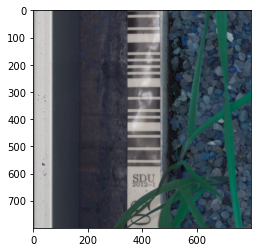

In [7]:
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

## Pre-processing the data

In [8]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:

        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                
                ## Pre-processing (via function pre_process) ##
                
                image = pre_process(new_array)
                
                
                training_data.append([image,class_num])
            except Exception as e:
                print(e)
                pass
create_training_data()    

In [9]:
train_len = len(training_data)

In [10]:
print("Number of training samples are ",train_len)

Number of training samples are  4463


In [11]:
import numpy as np

X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X = np.array(X).reshape(train_len,-1)

In [12]:
X = X/255.0

In [13]:
y = np.array(y)

In [14]:
y.shape

(4463,)

In [15]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',gamma='auto')
svc.fit(X, y)

SVC(gamma='auto', kernel='linear')

In [16]:
# Import train_test_split function
#from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [17]:
#y_pred = svc.predict(X_test)

In [18]:
#from sklearn.metrics import accuracy_score

#print(accuracy_score(y_test, y_pred))

In [19]:
test_data =[]
test_data_names = []
def create_test_data():

    for img in os.listdir(DATADIR_TEST):
        try:
            test_data_names.append(img)
            img_array=cv2.imread(os.path.join(DATADIR_TEST,img))
            new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))

            ## Pre-processing (via function pre_process)

            image = pre_process(new_array)


            test_data.append(image)
        except Exception as e:
            print(e)
            pass
create_test_data()

In [20]:
test_arr = np.array(test_data).reshape(len(test_data),-1)

In [21]:
test_arr = test_arr/255.0

In [22]:
len(test_arr)

794

In [23]:
y2 = svc.predict(test_arr)

In [24]:
len(y2)

794

In [25]:
y2

array([ 5,  7,  2,  9,  4,  8,  9,  2,  1,  4,  4, 10,  2,  1,  5,  9,  8,
        3,  3, 10,  7,  2,  9,  1,  5,  7, 10,  5,  1, 10,  1,  7,  5,  1,
        9,  6,  4,  9,  2,  8,  4,  3,  6,  1,  3, 10,  9,  8,  9,  4,  1,
        4,  1,  8,  5, 10,  4,  7, 10,  1,  4,  5,  5, 10,  2,  8,  3,  8,
        4, 10, 10,  9,  4,  5,  2,  5,  4,  6,  4,  8,  7, 10,  9,  9, 10,
        4,  8,  2,  3,  9,  5,  9,  6,  5,  0,  9, 10,  6,  3,  2,  2,  2,
        8,  5,  0,  4,  9,  0,  2,  4,  0,  7,  8,  5, 10,  2,  2,  1, 10,
        2,  1,  8,  0,  9,  4,  4, 10,  2, 10,  5,  9,  2,  8,  1,  1,  9,
        0,  5,  4,  1,  0,  5,  4,  9,  1,  9,  1,  4,  2,  4,  1,  4,  1,
        2,  2,  9,  9,  5,  4,  5,  3,  3,  9,  4,  9,  6, 10,  4,  5,  4,
        6,  1,  0,  6,  2,  5,  9,  1,  5,  6,  9, 10,  1,  5,  3,  7,  4,
       10,  8,  5,  3,  6,  1,  7,  4,  4,  9,  1,  4,  5,  9,  3,  3,  4,
        3,  8,  1,  2,  9,  9,  4,  9,  1,  2,  7,  8,  2,  7, 10,  2,  1,
        7,  5,  5,  0,  2

In [26]:
import csv
csv_columns = ['file','species']
with open("submission.csv", 'w') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
    writer.writeheader()
    for i in range(794):
        
        writer.writerow({'file': test_data_names[i], 'species':CATEGORIES[y2[i]]})